In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 10)


## Compare refugee migrations with non refugee (when we know the province ID can divide by total population)

In [82]:
refmigrationsto = []
refmigrationsfrom = []
refmigrations = pd.read_csv('calls_data/refMovement.csv')
col_list= list(refmigrations)
col_list.remove('from | to')
suma = refmigrations[col_list].sum(axis=1)
for i in range(len(refmigrations)):
    index = str(i+1)
    totalto = refmigrations[index].sum() 
    totalto -= refmigrations[index][i]
    refmigrationsto.append(totalto)
    totalfrom = suma[i]
    totalfrom -= refmigrations[index][i]
    refmigrationsfrom.append(totalfrom)


In [84]:
assert np.sum(refmigrationsto) == np.sum(refmigrationsfrom)

In [89]:
refmigrations['migrationsto'] = refmigrationsto
refmigrations['migrationsfrom'] = refmigrationsfrom
refmigrations['flow'] = refmigrations['migrationsto'] - refmigrations['migrationsfrom']  # flow of refugees (incoming - outcoming)

### Refugees migration flows

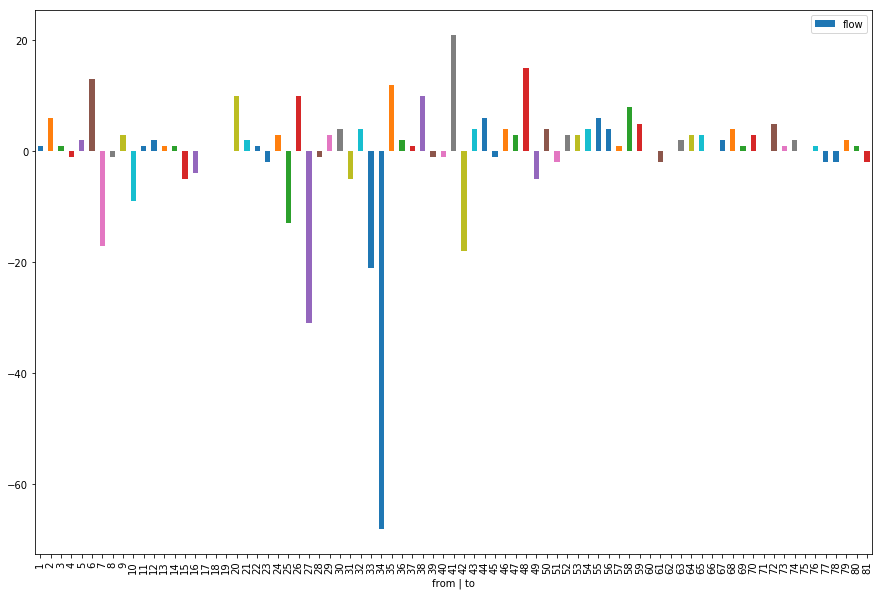

In [90]:
# total outflow (incoming - outgoingmigrationsfrom)
refmigrations.plot(kind='bar',x='from | to',y='flow',sort_columns=True)

In [103]:
print(np.sum(refmigrationsfrom))

7600


In [92]:
nonrefmigrationsto = []
nonrefmigrationsfrom = []
nonrefmigrations = pd.read_csv('calls_data/nonRefMovement.csv')
col_list= list(nonrefmigrations)
col_list.remove('from | to')
suma = nonrefmigrations[col_list].sum(axis=1)
for i in range(len(nonrefmigrations)):
    index = str(i+1)
    totalto = nonrefmigrations[index].sum() 
    totalto -= nonrefmigrations[index][i]
    nonrefmigrationsto.append(totalto)
    totalfrom = suma[i]
    totalfrom -= nonrefmigrations[index][i]
    nonrefmigrationsfrom.append(totalfrom)

In [93]:
assert np.sum(nonrefmigrationsto) == np.sum(nonrefmigrationsfrom)

In [102]:
print(np.sum(nonrefmigrationsfrom))

6119


In [95]:
nonrefmigrations['migrationsto'] = nonrefmigrationsto
nonrefmigrations['migrationsfrom'] = nonrefmigrationsfrom
nonrefmigrations['flow'] = nonrefmigrations['migrationsto'] - nonrefmigrations['migrationsfrom']  # flow of nonrefugees (incoming - outcoming)

### Non refugees migration flows

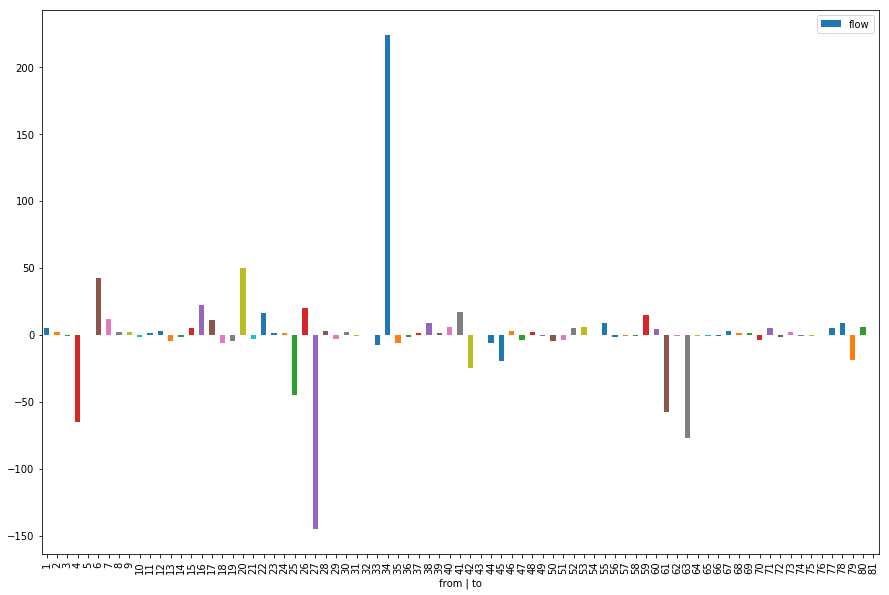

In [96]:
# total outflow (incoming - outgoingmigrationsfrom)
nonrefmigrations.plot(kind='bar',x='from | to',y='flow',sort_columns=True)

### Comparison : Refugees (blue) vs non refugees (red)

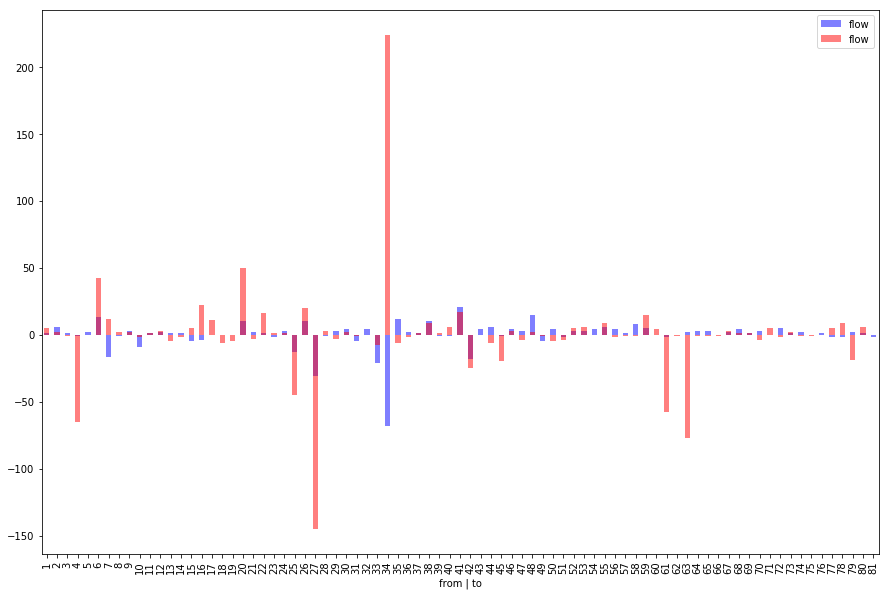

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)
refmigrations.plot(kind='bar',x='from | to',y='flow',sort_columns=True, ax=ax, color='blue', alpha=0.5)
nonrefmigrations.plot(kind='bar',x='from | to',y='flow',sort_columns=True, color='red', ax=ax, alpha=0.5)